In [1]:
library(reticulate)
# use_python("/opt/conda/bin/python",required=T)
# py_config()
library(rhdf5)
library(Seurat)
library(ggplot2)
library(dplyr)
library(spatialLIBD)
library(readr)
source('BEER/BEER.R')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SpatialExperiment

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package

[1] "Welcome to BEER (v0.1.9)!"


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:IRanges’:

    collapse


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.

Loading required package: genefilter


Attaching package: ‘genefilter’


The following object is masked from ‘package:readr’:

    spec


The following objects are masked from ‘package:MatrixGenerics’:

    rowSds, rowVars


The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars


Loading required package: BiocParallel


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [2]:
getwd()

[1] "/workspace/spatial_integration"

In [3]:
start_time = Sys.time()
# Sys.sleep(60)
end_time = Sys.time()
duration = end_time - start_time

print(start_time)
print(end_time)
print(duration)

[1] "2023-08-22 11:15:03 KST"
[1] "2023-08-22 11:15:03 KST"
Time difference of 0.0005655289 secs


In [4]:
# D1=readRDS('/home/spatial_integration/spatialLIBD/r_lib/assay_151507.rds')
# D2=readRDS('spatialLIBD/r_lib/assay_151672.rds')
# D3=readRDS('spatialLIBD/r_lib/assay_151673.rds')

# BATCH=c(rep('D1',ncol(D1)),
#         rep('D2',ncol(D2)),
#         rep('D3',ncol(D3)) )

# D12=.simple_combine(D1,D2)$combine
# D123=.simple_combine(D12,D3)$combine

# DATA = D123

# rm(D1);rm(D2);rm(D3);rm(D12)

In [5]:
spe_all <- readRDS('dataset/spe_all.rds')

In [6]:
start_time <- Sys.time()

DATA <- read_csv('dataset/datapoints/embed_all_com4_add_unfil.csv', name_repair='minimal')
end_time <- Sys.time()
duration <- end_time - start_time
print(duration)

Rows: 33538 Columns: 11881
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr     (1): rownames
dbl (11880): AAACAACGAATAGTTC-1, AAACAAGTATCTCCCA-1, AAACAATCTACTAGCA-1, AAA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Time difference of 28.93435 secs


In [7]:
print(duration)

Time difference of 28.93435 secs


In [8]:
D1=readRDS('dataset/df_logcount_507.rds')
D2=readRDS('dataset/df_logcount_672.rds')
D3=readRDS('dataset/df_logcount_673.rds')

In [9]:
spe_507 <- spe_all[, spe_all$sample_id == '151507']
spe_672 <- spe_all[, spe_all$sample_id == '151672']
spe_673 <- spe_all[, spe_all$sample_id == '151673']

In [10]:
LAYER=c(colData(spe_507)$'layer_guess',
        colData(spe_672)$'layer_guess',
       colData(spe_673)$'layer_guess')

In [11]:
class(LAYER)

[1] "factor"

In [12]:
char_layer <- as.character(LAYER)
# char_layer

In [13]:
class(char_layer)
length(char_layer)

[1] "character"

[1] 11880

In [14]:
BATCH=c(rep('D1',ncol(D1)),
        rep('D2',ncol(D2)),
        rep('D3',ncol(D3)) )


In [15]:
D1

AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1
ENSG00000243485 0.000000           0.0000000          0                 
ENSG00000237613 0.000000           0.0000000          0                 
ENSG00000186092 0.000000           0.0000000          0                 
ENSG00000238009 0.000000           0.0000000          0                 
ENSG00000239945 0.000000           0.0000000          0                 
ENSG00000239906 0.000000           0.0000000          0                 
ENSG00000241599 0.000000           0.0000000          0                 
ENSG00000236601 0.000000           0.0000000          0                 
ENSG00000284733 0.000000           0.0000000          0                 
ENSG00000235146 0.000000           0.0000000          0                 
ENSG00000284662 0.000000           0.0000000          0                 
ENSG00000229905 0.000000           0.0000000          0                 
ENSG00000237491 0.000000           0.0000000          0                 
ENSG00000177757 0.000000           0.0000000          0                 
ENSG00000225880 0.000000           0.0000000          0                 
ENSG00000230368 0.000000           0.0000000          0                 
ENSG00000272438 0.000000           0.0000000          0                 
ENSG00000230699 0.000000           0.0000000          0                 
ENSG00000241180 0.000000           0.0000000          0                 
ENSG00000223764 0.000000           0.0000000          0                 
ENSG00000187634 0.000000           0.0000000          0                 
ENSG00000188976 0.000000           0.0000000          0                 
ENSG00000187961 0.000000           0.0000000          0                 
ENSG00000187583 0.000000           0.0000000          0                 
ENSG00000187642 0.000000           0.0000000          0                 
ENSG00000272512 0.000000           0.0000000          0                 
ENSG00000188290 0.000000           0.0000000          0                 
ENSG00000187608 2.195668           0.8417394          0                 
ENSG00000224969 0.000000           0.0000000          0                 
ENSG00000188157 0.000000           0.0000000          0                 
⋮               ⋮                  ⋮                  ⋮                 
ENSG00000198727 4.240702           5.3437802          5.480828          
ENSG00000274175 0.000000           0.0000000          0.000000          
ENSG00000275869 0.000000           0.0000000          0.000000          
ENSG00000273554 0.000000           0.0000000          0.000000          
ENSG00000278782 0.000000           0.0000000          0.000000          
ENSG00000277761 0.000000           0.0000000          0.000000          
ENSG00000277836 0.000000           0.0000000          0.000000          
ENSG00000277666 0.000000           0.0000000          0.000000          
ENSG00000276760 0.000000           0.0000000          0.000000          
ENSG00000275249 0.000000           0.0000000          0.000000          
ENSG00000274792 0.000000           0.0000000          0.000000          
ENSG00000278704 0.000000           0.0000000          0.000000          
ENSG00000277400 0.000000           0.0000000          0.000000          
ENSG00000274847 0.000000           0.0000000          0.000000          
ENSG00000273496 0.000000           0.0000000          0.000000          
ENSG00000276256 0.000000           0.0000000          0.000000          
ENSG00000278198 0.000000           0.0000000          0.000000          
ENSG00000273748 0.000000           0.0000000          0.000000          
ENSG00000276017 0.000000           0.0000000          0.000000          
ENSG00000278817 0.000000           0.8417394          0.000000          
ENSG00000277196 0.000000           0.0000000          0.000000          
ENSG00000277630 0.000000           0.0000000          0.000000          
ENSG00000278384 0.000000           0.0000000          0.000000          
E

In [16]:
D2

AAACAAGTATCTCCCA-1 AAACACCAATAACTGC-1 AAACAGAGCGACTCCT-1
ENSG00000243485 0.0000000          0.00000            0.000000          
ENSG00000237613 0.0000000          0.00000            0.000000          
ENSG00000186092 0.0000000          0.00000            0.000000          
ENSG00000238009 0.0000000          0.00000            0.000000          
ENSG00000239945 0.0000000          0.00000            0.000000          
ENSG00000239906 0.0000000          0.00000            0.000000          
ENSG00000241599 0.0000000          0.00000            0.000000          
ENSG00000236601 0.0000000          0.00000            0.000000          
ENSG00000284733 0.0000000          0.00000            0.000000          
ENSG00000235146 0.0000000          0.00000            0.000000          
ENSG00000284662 0.0000000          0.00000            0.000000          
ENSG00000229905 0.0000000          0.00000            0.000000          
ENSG00000237491 0.0000000          0.00000            0.000000          
ENSG00000177757 0.0000000          0.00000            0.000000          
ENSG00000225880 0.0000000          0.00000            0.000000          
ENSG00000230368 0.0000000          0.00000            0.000000          
ENSG00000272438 0.0000000          0.00000            0.000000          
ENSG00000230699 0.0000000          0.00000            0.000000          
ENSG00000241180 0.0000000          0.00000            0.000000          
ENSG00000223764 0.0000000          0.00000            0.000000          
ENSG00000187634 0.0000000          0.00000            0.000000          
ENSG00000188976 0.0000000          0.00000            0.948332          
ENSG00000187961 0.0000000          0.00000            0.000000          
ENSG00000187583 0.0000000          0.00000            0.000000          
ENSG00000187642 0.0000000          0.00000            0.000000          
ENSG00000272512 0.0000000          0.00000            0.000000          
ENSG00000188290 0.7850231          1.13783            0.000000          
ENSG00000187608 1.2905658          0.00000            0.000000          
ENSG00000224969 0.0000000          0.00000            0.000000          
ENSG00000188157 0.7850231          0.00000            0.000000          
⋮               ⋮                  ⋮                  ⋮                 
ENSG00000198727 5.861123           5.615296           5.356656          
ENSG00000274175 0.000000           0.000000           0.000000          
ENSG00000275869 0.000000           0.000000           0.000000          
ENSG00000273554 0.000000           0.000000           0.000000          
ENSG00000278782 0.000000           0.000000           0.000000          
ENSG00000277761 0.000000           0.000000           0.000000          
ENSG00000277836 0.000000           0.000000           0.000000          
ENSG00000277666 0.000000           0.000000           0.000000          
ENSG00000276760 0.000000           0.000000           0.000000          
ENSG00000275249 0.000000           0.000000           0.000000          
ENSG00000274792 0.000000           0.000000           0.000000          
ENSG00000278704 0.000000           0.000000           0.000000          
ENSG00000277400 0.000000           0.000000           0.000000          
ENSG00000274847 0.000000           0.000000           0.000000          
ENSG00000273496 0.000000           0.000000           0.000000          
ENSG00000276256 0.000000           0.000000           0.000000          
ENSG00000278198 0.000000           0.000000           0.000000          
ENSG00000273748 0.000000           0.000000           0.000000          
ENSG00000276017 0.000000           0.000000           0.000000          
ENSG00000278817 0.000000           0.000000           0.000000          
ENSG00000277196 0.000000           0.000000           0.000000          
ENSG00000277630 0.000000           0.000000           0.000000          
ENSG00000278384 0.000000           0.000000           0.000000          
E

In [17]:
D3

AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1 AAACACCAATAACTGC-1
ENSG00000243485 0.0000000          0.00000            0.0000000         
ENSG00000237613 0.0000000          0.00000            0.0000000         
ENSG00000186092 0.0000000          0.00000            0.0000000         
ENSG00000238009 0.0000000          0.00000            0.0000000         
ENSG00000239945 0.0000000          0.00000            0.0000000         
ENSG00000239906 0.0000000          0.00000            0.0000000         
ENSG00000241599 0.0000000          0.00000            0.0000000         
ENSG00000236601 0.0000000          0.00000            0.0000000         
ENSG00000284733 0.0000000          0.00000            0.0000000         
ENSG00000235146 0.0000000          0.00000            0.0000000         
ENSG00000284662 0.0000000          0.00000            0.0000000         
ENSG00000229905 0.0000000          0.00000            0.0000000         
ENSG00000237491 0.0000000          0.00000            0.0000000         
ENSG00000177757 0.0000000          0.00000            0.0000000         
ENSG00000225880 0.0000000          0.00000            0.0000000         
ENSG00000230368 0.0000000          0.00000            0.0000000         
ENSG00000272438 0.0000000          0.00000            0.0000000         
ENSG00000230699 0.0000000          0.00000            0.0000000         
ENSG00000241180 0.0000000          0.00000            0.0000000         
ENSG00000223764 0.0000000          0.00000            0.0000000         
ENSG00000187634 0.0000000          0.00000            0.0000000         
ENSG00000188976 0.0000000          0.00000            0.9662463         
ENSG00000187961 0.0000000          0.00000            0.0000000         
ENSG00000187583 0.0000000          0.00000            0.0000000         
ENSG00000187642 0.0000000          0.00000            0.0000000         
ENSG00000272512 0.0000000          0.00000            0.0000000         
ENSG00000188290 0.4655466          0.00000            0.0000000         
ENSG00000187608 0.0000000          0.00000            0.0000000         
ENSG00000224969 0.0000000          0.00000            0.0000000         
ENSG00000188157 0.4655466          2.26171            0.0000000         
⋮               ⋮                  ⋮                  ⋮                 
ENSG00000198727 5.186586           4.784984           4.792075          
ENSG00000274175 0.000000           0.000000           0.000000          
ENSG00000275869 0.000000           0.000000           0.000000          
ENSG00000273554 0.000000           0.000000           0.000000          
ENSG00000278782 0.000000           0.000000           0.000000          
ENSG00000277761 0.000000           0.000000           0.000000          
ENSG00000277836 0.000000           0.000000           0.000000          
ENSG00000277666 0.000000           0.000000           0.000000          
ENSG00000276760 0.000000           0.000000           0.000000          
ENSG00000275249 0.000000           0.000000           0.000000          
ENSG00000274792 0.000000           0.000000           0.000000          
ENSG00000278704 0.000000           0.000000           0.000000          
ENSG00000277400 0.000000           0.000000           0.000000          
ENSG00000274847 0.000000           0.000000           0.000000          
ENSG00000273496 0.000000           0.000000           0.000000          
ENSG00000276256 0.000000           0.000000           0.000000          
ENSG00000278198 0.000000           0.000000           0.000000          
ENSG00000273748 0.000000           0.000000           0.000000          
ENSG00000276017 0.000000           0.000000           0.000000          
ENSG00000278817 0.000000           0.000000           0.000000          
ENSG00000277196 0.000000           0.000000           0.000000          
ENSG00000277630 0.000000           0.000000           0.000000          
ENSG00000278384 0.000000           0.000000           0.000000          
E

In [18]:
DATA

rownames        AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1
1     ENSG00000243485 0.5002439          0.5065333          0.5025926         
2     ENSG00000237613 0.5002464          0.5065479          0.5026034         
3     ENSG00000186092 0.5002464          0.5065479          0.5026034         
4     ENSG00000238009 0.5002464          0.5065479          0.5026034         
5     ENSG00000239945 0.5002365          0.5065190          0.5025903         
6     ENSG00000239906 0.5002464          0.5065479          0.5026034         
7     ENSG00000241599 0.5039640          0.5088511          0.5058614         
8     ENSG00000236601 0.5002464          0.5065479          0.5026034         
9     ENSG00000284733 0.5002332          0.5065360          0.5025953         
10    ENSG00000235146 0.5014187          0.5073508          0.5036850         
11    ENSG00000284662 0.5004850          0.5066921          0.5028665         
12    ENSG00000229905 0.5002464          0.5065479          0.5026034         
13    ENSG00000237491 0.5002464          0.5065479          0.5026034         
14    ENSG00000177757 0.5002293          0.5065080          0.5026042         
15    ENSG00000225880 0.5011673          0.5072426          0.5036191         
16    ENSG00000230368 0.5002464          0.5065479          0.5026034         
17    ENSG00000272438 0.5002427          0.5065431          0.5026012         
18    ENSG00000230699 0.5002464          0.5065479          0.5026034         
19    ENSG00000241180 0.5003013          0.5065171          0.5026787         
20    ENSG00000223764 0.5002443          0.5065426          0.5026029         
21    ENSG00000187634 0.5002464          0.5065479          0.5026034         
22    ENSG00000188976 0.5002464          0.5065479          0.5026034         
23    ENSG00000187961 0.5002464          0.5065479          0.5026034         
24    ENSG00000187583 0.5002464          0.5065479          0.5026034         
25    ENSG00000187642 0.5076463          0.5110471          0.5096384         
26    ENSG00000272512 0.5009192          0.5070863          0.5032468         
27    ENSG00000188290 0.5002464          0.5065479          0.5026034         
28    ENSG00000187608 2.6990494          1.3502188          0.5052893         
29    ENSG00000224969 0.5002340          0.5065205          0.5025892         
30    ENSG00000188157 0.5002421          0.5065339          0.5025952         
⋮     ⋮               ⋮                  ⋮                  ⋮                 
33509 ENSG00000198727 4.7409435          5.8502976          5.9834154         
33510 ENSG00000274175 0.5026126          0.5080254          0.5047487         
33511 ENSG00000275869 0.5002464          0.5065479          0.5026034         
33512 ENSG00000273554 0.5002464          0.5065479          0.5026034         
33513 ENSG00000278782 0.5002318          0.5065007          0.5025739         
33514 ENSG00000277761 0.5002464          0.5065479          0.5026034         
33515 ENSG00000277836 0.5002464          0.5065479          0.5026034         
33516 ENSG00000277666 0.5002345          0.5065121          0.5025957         
33517 ENSG00000276760 0.5002409          0.5065461          0.5025964         
33518 ENSG00000275249 0.5016959          0.5074457          0.5039065         
33519 ENSG00000274792 0.5002464          0.5065479          0.5026034         
33520 ENSG00000278704 0.5002464          0.5065479          0.5026034         
33521 ENSG00000277400 0.5002467          0.5065162          0.5025888         
33522 ENSG00000274847 0.5002325          0.5065263          0.5025891         
33523 ENSG00000273496 0.5002464          0.5065479          0.5026034         
33524 ENSG00000276256 0.5002464          0.5065479          0.5026034         
33525 ENSG00000278198 0.5002274          0.5065164          0.5025820         
33526 ENSG00000273748 0.5002380          0.5065365          0.5025967         
33527 ENSG00000276017 0.5014793          0.5074138      

In [20]:
DATA[,1]

rownames       
1     ENSG00000243485
2     ENSG00000237613
3     ENSG00000186092
4     ENSG00000238009
5     ENSG00000239945
6     ENSG00000239906
7     ENSG00000241599
8     ENSG00000236601
9     ENSG00000284733
10    ENSG00000235146
11    ENSG00000284662
12    ENSG00000229905
13    ENSG00000237491
14    ENSG00000177757
15    ENSG00000225880
16    ENSG00000230368
17    ENSG00000272438
18    ENSG00000230699
19    ENSG00000241180
20    ENSG00000223764
21    ENSG00000187634
22    ENSG00000188976
23    ENSG00000187961
24    ENSG00000187583
25    ENSG00000187642
26    ENSG00000272512
27    ENSG00000188290
28    ENSG00000187608
29    ENSG00000224969
30    ENSG00000188157
⋮     ⋮              
33509 ENSG00000198727
33510 ENSG00000274175
33511 ENSG00000275869
33512 ENSG00000273554
33513 ENSG00000278782
33514 ENSG00000277761
33515 ENSG00000277836
33516 ENSG00000277666
33517 ENSG00000276760
33518 ENSG00000275249
33519 ENSG00000274792
33520 ENSG00000278704
33521 ENSG00000277400
33522 ENSG00000274847
33523 ENSG00000273496
33524 ENSG00000276256
33525 ENSG00000278198
33526 ENSG00000273748
33527 ENSG00000276017
33528 ENSG00000278817
33529 ENSG00000277196
33530 ENSG00000277630
33531 ENSG00000278384
33532 ENSG00000278633
33533 ENSG00000276345
33534 ENSG00000277856
33535 ENSG00000275063
33536 ENSG00000271254
33537 ENSG00000277475
33538 ENSG00000268674

In [19]:
colnames(DATA)

[1] "rownames"                   "AAACAACGAATAGTTC-1"        
    [3] "AAACAAGTATCTCCCA-1...3"     "AAACAATCTACTAGCA-1...4"    
    [5] "AAACACCAATAACTGC-1...5"     "AAACAGCTTTCAGAAG-1...6"    
    [7] "AAACAGGGTCTATATT-1...7"     "AAACAGTGTTCCTGGG-1...8"    
    [9] "AAACATTTCCCGGATT-1...9"     "AAACCACTACACAGAT-1...10"   
   [11] "AAACCCGAACGAAATC-1...11"    "AAACCGGGTAGGTACC-1...12"   
   [13] "AAACCGTTCGTCCAGG-1...13"    "AAACCTAAGCAGCCGG-1...14"   
   [15] "AAACCTCATGAAGTTG-1...15"    "AAACGAAGAACATACC-1...16"   
   [17] "AAACGACAGTCTTGCC-1...17"    "AAACGAGACGGTTGAT-1...18"   
   [19] "AAACGCCCGAGATCGG-1...19"    "AAACGGGCGTACGGGT-1...20"   
   [21] "AAACGGGTTGGTATCC-1"         "AAACGGTTGCGAACTG-1...22"   
   [23] "AAACGTGTTCGCCCTA-1...23"    "AAACTAACGTGGCGAC-1...24"   
   [25] "AAACTCGGTTCGCAAT-1...25"    "AAACTCGTGATATAAG-1...26"   
   [27] "AAACTGCTGGCTCCAA-1...27"    "AAACTTGCAAACGTAT-1...28"   
   [29] "AAAGAATGTGGACTAA-1"         "AAAGACATGAAGTTTA-1...30"   
   [31] "AAAGACCCAAGTCGCG-1...31"    "AAAGACTGGGCGCTTT-1...32"   
   [33] "AAAGGCTACGGACCAT-1...33"    "AAAGGCTCTCGCGCCG-1...34"   
   [35] "AAAGGGATGTAGCAAG-1...35"    "AAAGGGCAGCTTGAAT-1...36"   
   [37] "AAAGGTAAGCTGTACC-1...37"    "AAAGGTCAACGACATG-1...38"   
   [39] "AAAGTAGCATTGCTCA-1...39"    "AAAGTCACTGATGTAA-1...40"   
   [41] "AAAGTCGACCCTCAGT-1...41"    "AAAGTGTGATTTATCT-1...42"   
   [43] "AAAGTTGACTCCCGTA-1...43"    "AAATAACCATACGGGA-1...44"   
   [45] "AAATAAGGTAGTGCCC-1...45"    "AAATACCTATAAGCAT-1...46"   
   [47] "AAATAGCTTAGACTTT-1...47"    "AAATAGGGTGCTATTG-1...48"   
   [49] "AAATCACTCCTAAACG-1"         "AAATCCGATACACGCC-1...50"   
   [51] "AAATCGTGTACCACAA-1...51"    "AAATCTAGCCCTGCTA-1...52"   
   [53] "AAATGATTCGATCAGC-1...53"    "AAATGCTCGTTACGTT-1...54"   
   [55] "AAATGGCATGTCTTGT-1...55"    "AAATGGCCCGTGCCCT-1...56"   
   [57] "AAATGGTCAATGTGCC-1...57"    "AAATGTATCTTATCCC-1...58"   
   [59] "AAATGTGGGTGCTCCT-1...59"    "AAATTAACGGGTAGCT-1...60"   
   [61] "AAATTAATAAGCGCGA-1...61"    "AAATTACACGACTCTG-1...62"   
   [63] "AAATTACCTATCGATG-1...63"    "AAATTCCAGGTCCAAA-1...64"   
   [65] "AAATTGATAGTCCTTT-1...65"    "AAATTGCGGCGGTTCT-1...66"   
   [67] "AAATTGGTGAGAAGCA-1...67"    "AAATTTACCGAAATCC-1...68"   
   [69] "AAATTTGCGGGTGTGG-1...69"    "AACAACTGGTAGTTGC-1...70"   
   [71] "AACAATACATTGTCGA-1...71"    "AACAATTACTCTACGC-1...72"   
   [73] "AACACACGCTCGCCGC-1...73"    "AACACGACTGTACTGA-1...74"   
   [75] "AACACGAGACGCGGCC-1...75"    "AACACGCGGCCGCGAA-1...76"   
   [77] "AACAGCTGTGTGGCAA-1...77"    "AACAGGAAATCGAATA-1...78"   
   [79] "AACAGGATGGGCCGCG-1...79"    "AACAGGTAGTATGGAT-1...80"   
   [81] "AACATAGCGTGTATCG-1"         "AACATATCAACTGGTG-1...82"   
   [83] "AACATCGATACGTCTA-1...83"    "AACATTGGTCAGCCGT-1...84"   
   [85] "AACATTGTGACTCGAG-1...85"    "AACCAAGACTTCTCTG-1...86"   
   [87] "AACCAGTATCACTCTT-1...87"    "AACCATGGGATCGCTA-1...88"   
   [89] "AACCCAGAGACGGAGA-1...89"    "AACCCGACAACCCGTG-1...90"   
   [91] "AACCCGAGCAGAATCG-1...91"    "AACCCGATAGGGCTTC-1...92"   
   [93] "AACCCTACTGTCAATA-1...93"    "AACCCTGGTGGAACCA-1...94"   
   [95] "AACCGAGCTTGGTCAT-1...95"    "AACCGCTAAGGGATGC-1...96"   
   [97] "AACCGTTGTGTTTGCT-1...97"    "AACCTAAAGCCGTCCG-1...98"   
   [99] "AACCTCGCTTTAGCCC-1...99"    "AACCTGTCACGGAATT-1...100"  
  [101] "AACCTTTAAATACGGT-1...101"   "AACCTTTACGACGTCT-1...102"  
  [103] "AACGATAATGCCGTAG-1...103"   "AACGATAGAAGGGCCG-1...104"  
  [105] "AACGATATGTCAACTG-1...105"   "AACGCATGATCTGGGT-1...106"  
  [107] "AACGCGAACGGCAACA-1...107"   "AACGCGACCTTGGGCG-1...108"  
  [109] "AACGCGGTCTCCAGCC-1...109"   "AACGCTGTTGCTGAAA-1...110"  
  [111] "AACGGACGTACGTATA-1...111"   "AACGGCCATCTCCGGT-1...112"  
  [113] "AACGTACTGTGGGTAC-1...113"   "AACGTAGTCTACCCAT-1...114"  
  [115] "AACGTCAGACTAGTGG-1...115"   "AACGTGATGAAGGACA-1...116"  
  [117] "AACGTGCGAAAGTCTC-1...117"   "AACGTTATCAGCACCT-1...118"  
  [119] "AACTACCCGTTTGTCA-1...119"   "AACTAGCGTATCGCAC-1...120"  
  [121] "AACTAGGCTTGGGTGT-1...121"   "AACTCA

In [22]:
rownames(DATA) <- DATA$rownames
DATA

Warning message:
“Setting row names on a tibble is deprecated.”


rownames        AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1
1     ENSG00000243485 0.5002439          0.5065333          0.5025926         
2     ENSG00000237613 0.5002464          0.5065479          0.5026034         
3     ENSG00000186092 0.5002464          0.5065479          0.5026034         
4     ENSG00000238009 0.5002464          0.5065479          0.5026034         
5     ENSG00000239945 0.5002365          0.5065190          0.5025903         
6     ENSG00000239906 0.5002464          0.5065479          0.5026034         
7     ENSG00000241599 0.5039640          0.5088511          0.5058614         
8     ENSG00000236601 0.5002464          0.5065479          0.5026034         
9     ENSG00000284733 0.5002332          0.5065360          0.5025953         
10    ENSG00000235146 0.5014187          0.5073508          0.5036850         
11    ENSG00000284662 0.5004850          0.5066921          0.5028665         
12    ENSG00000229905 0.5002464          0.5065479          0.5026034         
13    ENSG00000237491 0.5002464          0.5065479          0.5026034         
14    ENSG00000177757 0.5002293          0.5065080          0.5026042         
15    ENSG00000225880 0.5011673          0.5072426          0.5036191         
16    ENSG00000230368 0.5002464          0.5065479          0.5026034         
17    ENSG00000272438 0.5002427          0.5065431          0.5026012         
18    ENSG00000230699 0.5002464          0.5065479          0.5026034         
19    ENSG00000241180 0.5003013          0.5065171          0.5026787         
20    ENSG00000223764 0.5002443          0.5065426          0.5026029         
21    ENSG00000187634 0.5002464          0.5065479          0.5026034         
22    ENSG00000188976 0.5002464          0.5065479          0.5026034         
23    ENSG00000187961 0.5002464          0.5065479          0.5026034         
24    ENSG00000187583 0.5002464          0.5065479          0.5026034         
25    ENSG00000187642 0.5076463          0.5110471          0.5096384         
26    ENSG00000272512 0.5009192          0.5070863          0.5032468         
27    ENSG00000188290 0.5002464          0.5065479          0.5026034         
28    ENSG00000187608 2.6990494          1.3502188          0.5052893         
29    ENSG00000224969 0.5002340          0.5065205          0.5025892         
30    ENSG00000188157 0.5002421          0.5065339          0.5025952         
⋮     ⋮               ⋮                  ⋮                  ⋮                 
33509 ENSG00000198727 4.7409435          5.8502976          5.9834154         
33510 ENSG00000274175 0.5026126          0.5080254          0.5047487         
33511 ENSG00000275869 0.5002464          0.5065479          0.5026034         
33512 ENSG00000273554 0.5002464          0.5065479          0.5026034         
33513 ENSG00000278782 0.5002318          0.5065007          0.5025739         
33514 ENSG00000277761 0.5002464          0.5065479          0.5026034         
33515 ENSG00000277836 0.5002464          0.5065479          0.5026034         
33516 ENSG00000277666 0.5002345          0.5065121          0.5025957         
33517 ENSG00000276760 0.5002409          0.5065461          0.5025964         
33518 ENSG00000275249 0.5016959          0.5074457          0.5039065         
33519 ENSG00000274792 0.5002464          0.5065479          0.5026034         
33520 ENSG00000278704 0.5002464          0.5065479          0.5026034         
33521 ENSG00000277400 0.5002467          0.5065162          0.5025888         
33522 ENSG00000274847 0.5002325          0.5065263          0.5025891         
33523 ENSG00000273496 0.5002464          0.5065479          0.5026034         
33524 ENSG00000276256 0.5002464          0.5065479          0.5026034         
33525 ENSG00000278198 0.5002274          0.5065164          0.5025820         
33526 ENSG00000273748 0.5002380          0.5065365          0.5025967         
33527 ENSG00000276017 0.5014793          0.5074138      

In [23]:
DATA[,1] <- NULL
DATA

AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 AAACAATCTACTAGCA-1
1     0.5002439          0.5065333          0.5025926         
2     0.5002464          0.5065479          0.5026034         
3     0.5002464          0.5065479          0.5026034         
4     0.5002464          0.5065479          0.5026034         
5     0.5002365          0.5065190          0.5025903         
6     0.5002464          0.5065479          0.5026034         
7     0.5039640          0.5088511          0.5058614         
8     0.5002464          0.5065479          0.5026034         
9     0.5002332          0.5065360          0.5025953         
10    0.5014187          0.5073508          0.5036850         
11    0.5004850          0.5066921          0.5028665         
12    0.5002464          0.5065479          0.5026034         
13    0.5002464          0.5065479          0.5026034         
14    0.5002293          0.5065080          0.5026042         
15    0.5011673          0.5072426          0.5036191         
16    0.5002464          0.5065479          0.5026034         
17    0.5002427          0.5065431          0.5026012         
18    0.5002464          0.5065479          0.5026034         
19    0.5003013          0.5065171          0.5026787         
20    0.5002443          0.5065426          0.5026029         
21    0.5002464          0.5065479          0.5026034         
22    0.5002464          0.5065479          0.5026034         
23    0.5002464          0.5065479          0.5026034         
24    0.5002464          0.5065479          0.5026034         
25    0.5076463          0.5110471          0.5096384         
26    0.5009192          0.5070863          0.5032468         
27    0.5002464          0.5065479          0.5026034         
28    2.6990494          1.3502188          0.5052893         
29    0.5002340          0.5065205          0.5025892         
30    0.5002421          0.5065339          0.5025952         
⋮     ⋮                  ⋮                  ⋮                 
33509 4.7409435          5.8502976          5.9834154         
33510 0.5026126          0.5080254          0.5047487         
33511 0.5002464          0.5065479          0.5026034         
33512 0.5002464          0.5065479          0.5026034         
33513 0.5002318          0.5065007          0.5025739         
33514 0.5002464          0.5065479          0.5026034         
33515 0.5002464          0.5065479          0.5026034         
33516 0.5002345          0.5065121          0.5025957         
33517 0.5002409          0.5065461          0.5025964         
33518 0.5016959          0.5074457          0.5039065         
33519 0.5002464          0.5065479          0.5026034         
33520 0.5002464          0.5065479          0.5026034         
33521 0.5002467          0.5065162          0.5025888         
33522 0.5002325          0.5065263          0.5025891         
33523 0.5002464          0.5065479          0.5026034         
33524 0.5002464          0.5065479          0.5026034         
33525 0.5002274          0.5065164          0.5025820         
33526 0.5002380          0.5065365          0.5025967         
33527 0.5014793          0.5074138          0.5038208         
33528 0.5002464          1.3482873          0.5026034         
33529 0.5002464          0.5065479          0.5026034         
33530 0.5002207          0.5064792          0.5025629         
33531 0.5003754          0.5065648          0.5027310         
33532 0.5005102          0.5067100          0.5029187         
33533 0.5002464          0.5065479          0.5026034         
33534 0.5002464          0.5065479          0.5026034         
33535 0.5002464          0.5065479          0.5026034         
33536 0.5002410          0.5065441          0.5025968         
33537 0.5002464          0.5065479          0.5026034         
33538 0.5002271          0.5065325          0.5025958         
      AAACACCAATAACTGC-1 AAACAGCTTTCAGAAG-1 AAACAGGGTCTATATT-1
1     0.4991453          0.5011582   

In [24]:
length(BATCH)

[1] 11880

In [25]:
class(BATCH)

[1] "character"

In [26]:
dim(D1)
dim(D2)
dim(D3)
dim(DATA)
# dim(dummy_dat)

[1] 33538  4226

[1] 33538  4015

[1] 33538  3639

[1] 33538 11880

In [27]:
mybeer=BEER(DATA, BATCH, GNUM=50, PCNUM=20, ROUND=1, GN=1000, SEED=1, COMBAT=TRUE)

[1] "BEER start!"
[1] "2023-08-22 11:19:37 KST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 50
[1] "Varible gene number (GN) of each batch is:"
[1] 1000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "D1"
[1] 2
[1] "D2"
[1] 3
[1] "D3"
[1] "Total varible gene number (GN) is:"
[1] 2232


Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Found3batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  32100 
Negative:  15491 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:21:16 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

11:21:16 Read 11880 rows and found 20 numeric columns

11:21:16 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

11:21:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

[1] "Get group for:"
[1] "D1"
[1] "Group Number:"
[1] 50
[1] "Get group for:"
[1] "D2"
[1] "Group Number:"
[1] 50
[1] "Get group for:"
[1] "D3"
[1] "Group Number:"
[1] 50
[1] "Finding MN pairs..."
[1] "1 / 150"
[1] "101 / 150"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 4
[1] "Evaluating PCs ..."
[1] "Start"


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 1


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 2


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 3


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 4


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 5


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 6


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 7


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 8


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 9


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 10


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 11


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 12


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 13


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 14


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 15


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 16


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 17


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 18


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 19


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 20
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "############################################################################"
[1] "2023-08-22 11:22:18 KST"


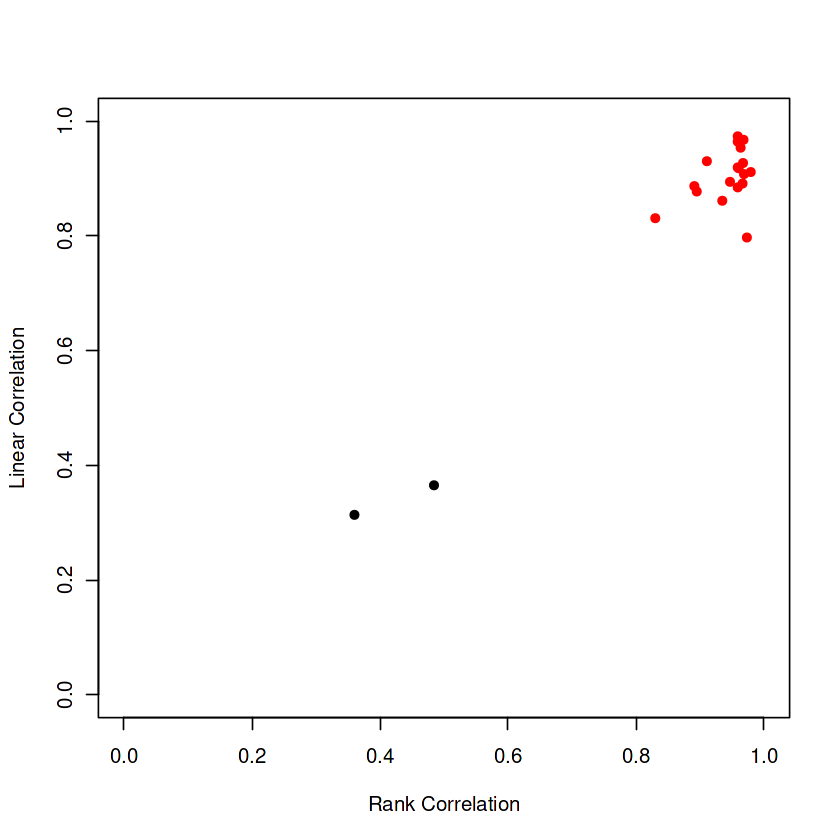

In [28]:
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

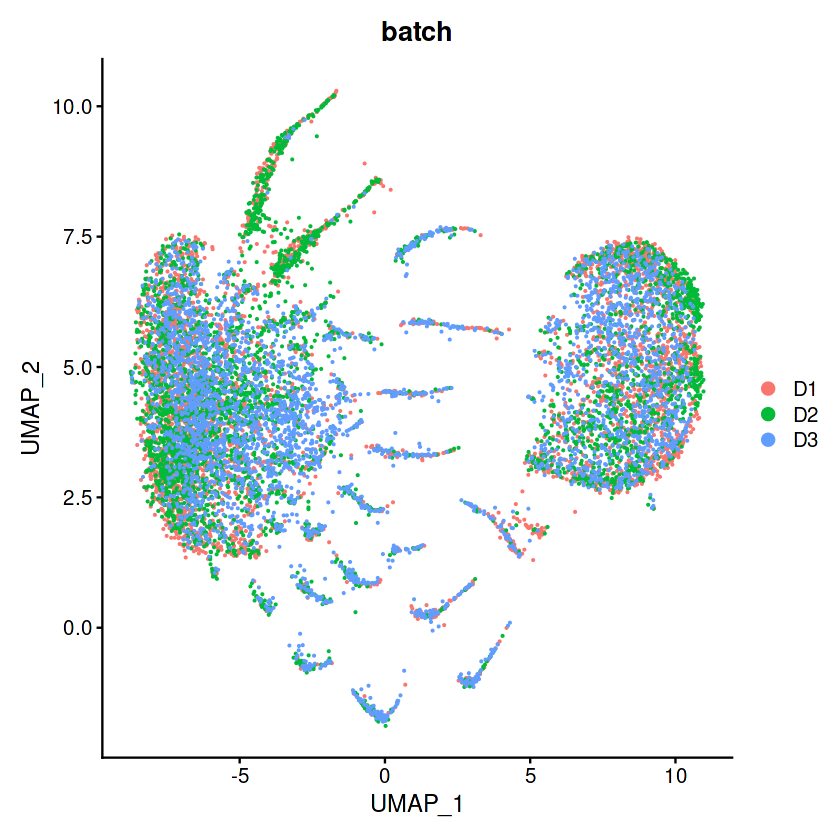

In [29]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc@meta.data$orig.ident=char_layer
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

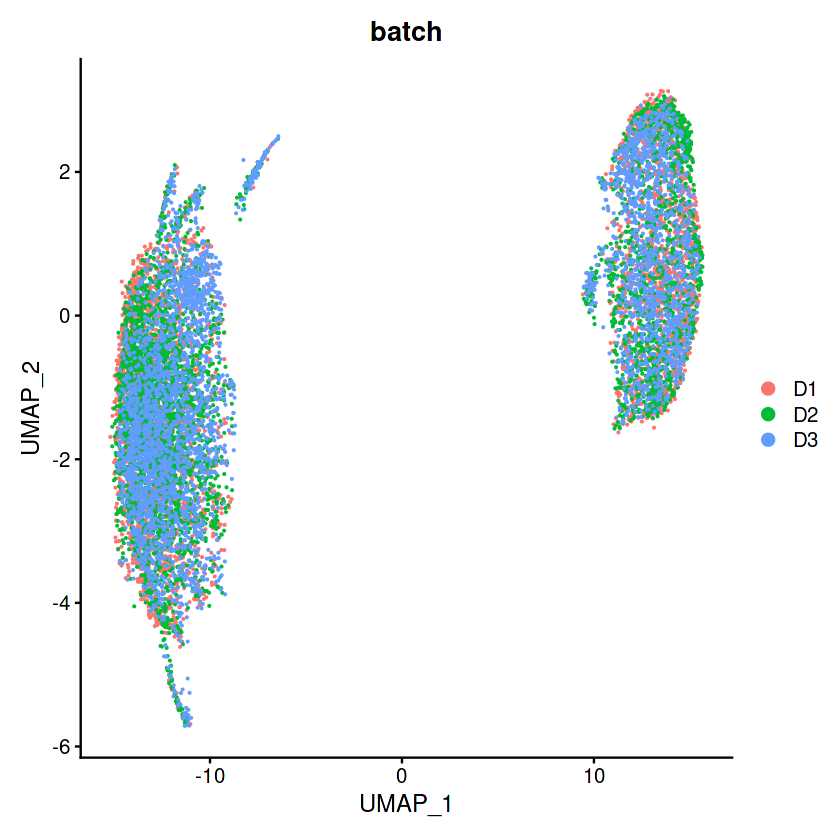

In [42]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc@meta.data$orig.ident=char_layer
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

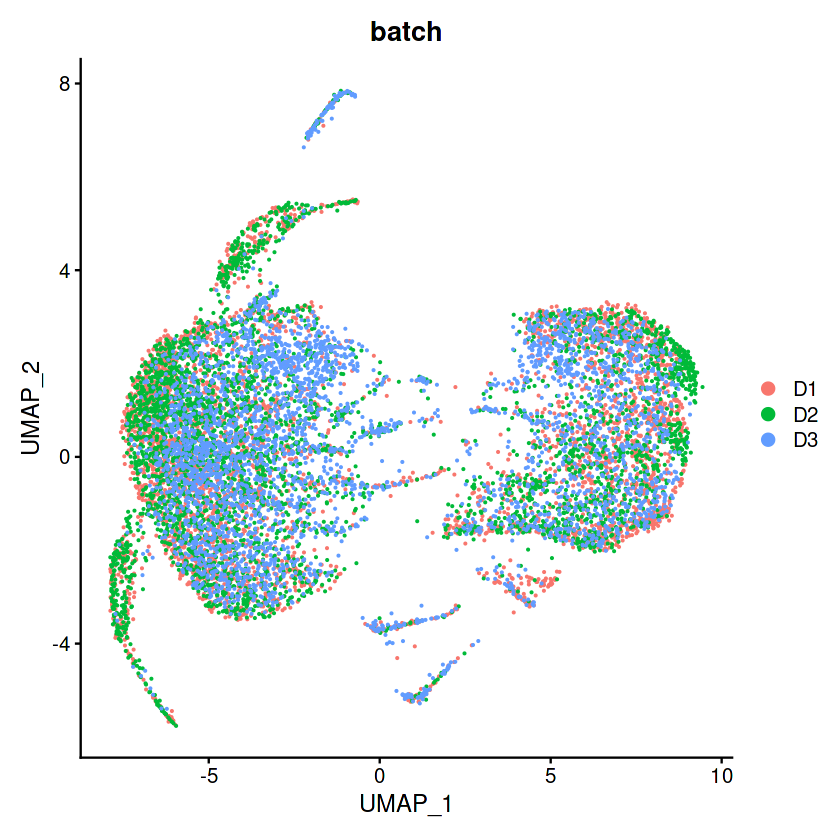

In [29]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc@meta.data$orig.ident=char_layer
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

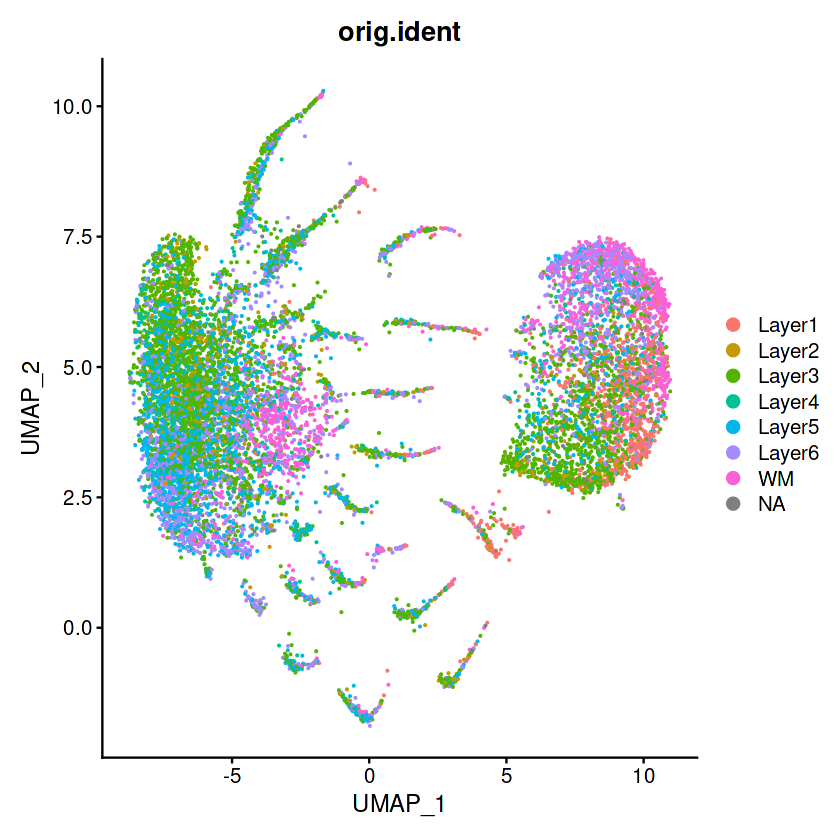

In [30]:
# pbmc <- mybeer$seurat
# PCUSE <- mybeer$select
# pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.1)  

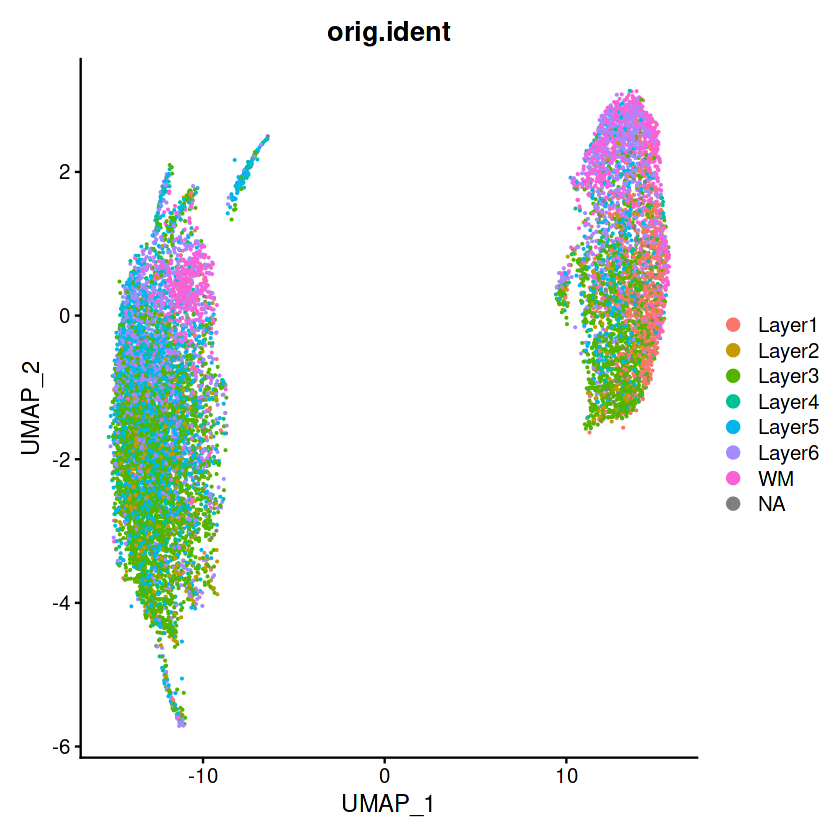

In [43]:
# pbmc <- mybeer$seurat
# PCUSE <- mybeer$select
# pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.1)  

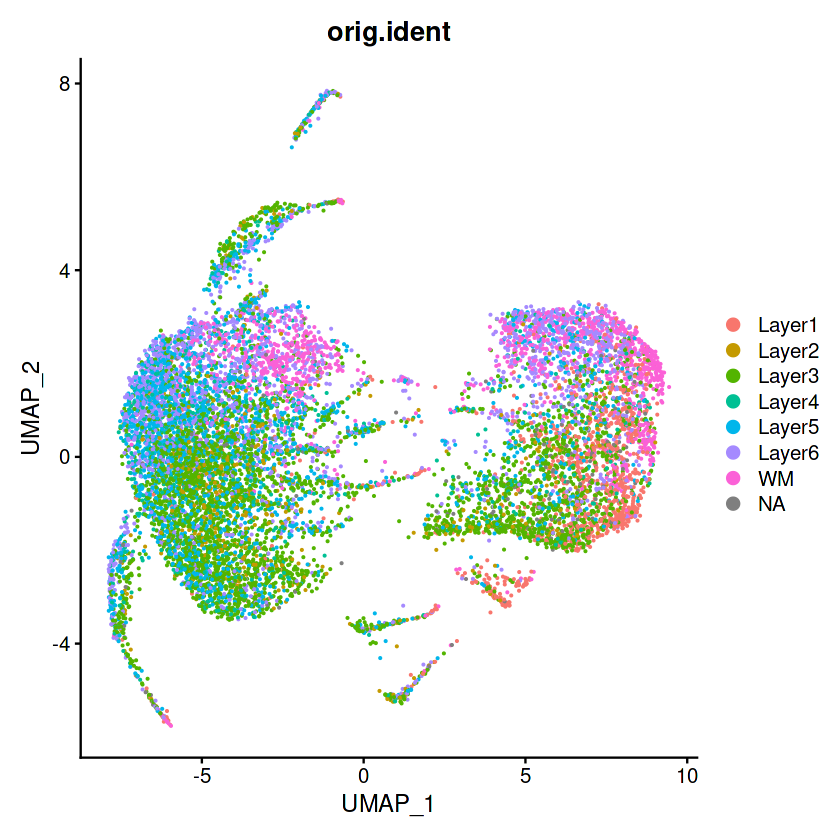

In [30]:
# pbmc <- mybeer$seurat
# PCUSE <- mybeer$select
# pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.1)  

In [35]:
param <- 'com4a_unfil_umap_plot_gg_0816_gnum50_pc30_GN1000_R2.png'
par_only <- '_gnum50_pc30_GN1000_R2.png'

In [36]:
layer <- paste('layer',param,sep='_')

In [37]:
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 
ggsave(param,umap_plot)

Saving 6.67 x 6.67 in image


In [38]:
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='orig.ident', pt.size=0.1) 
ggsave(layer,umap_plot)

Saving 6.67 x 6.67 in image


In [40]:
png(paste('com4a_unfil_corr_plot_0816',par_only))
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))
dev.off()

png 
  2

Centering and scaling data matrix

PC_ 1 
Positive:  3457 
Negative:  ENSG00000142192 



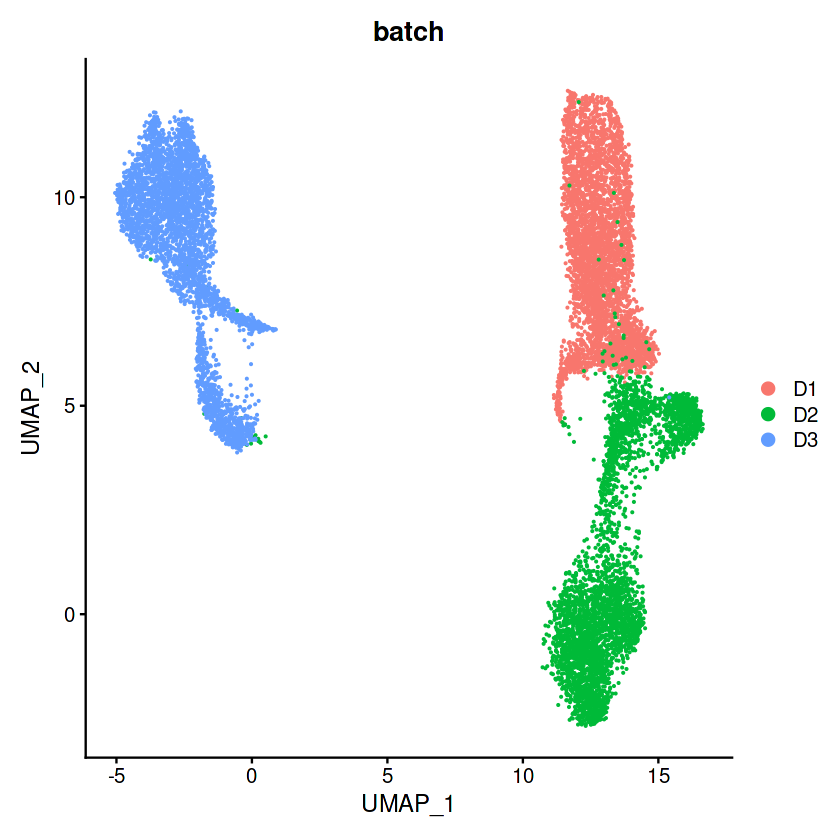

In [36]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch@meta.data$orig.ident=char_layer
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix

PC_ 1 
Positive:  ENSG00000175874 
Negative:  ENSG00000204792-spat 



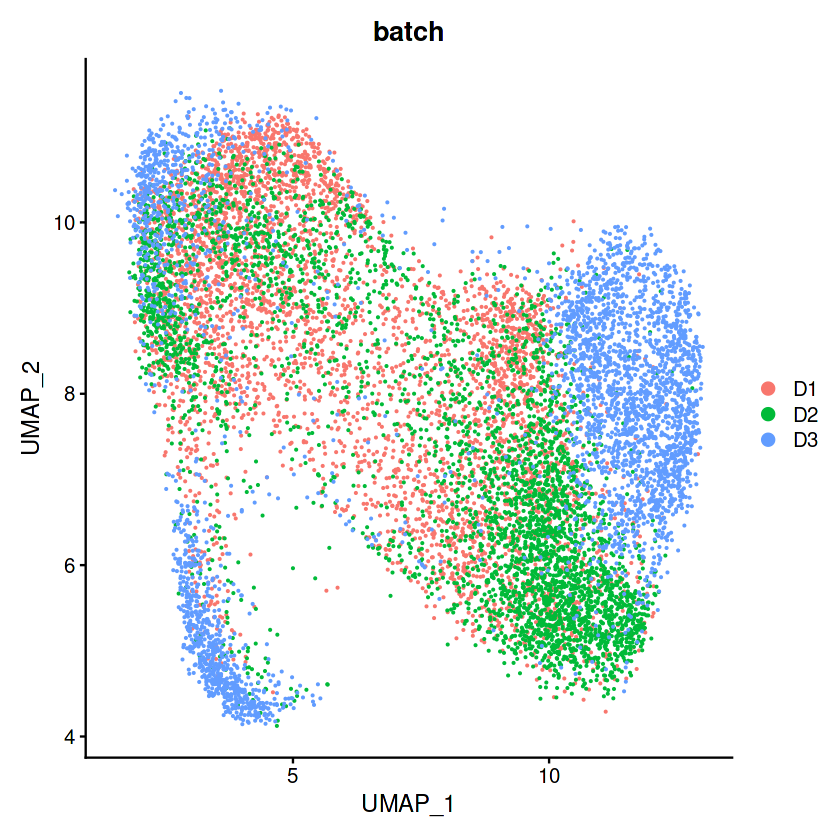

In [31]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch@meta.data$orig.ident=char_layer
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

Centering and scaling data matrix

PC_ 1 
Positive:  10482 
Negative:  4256 



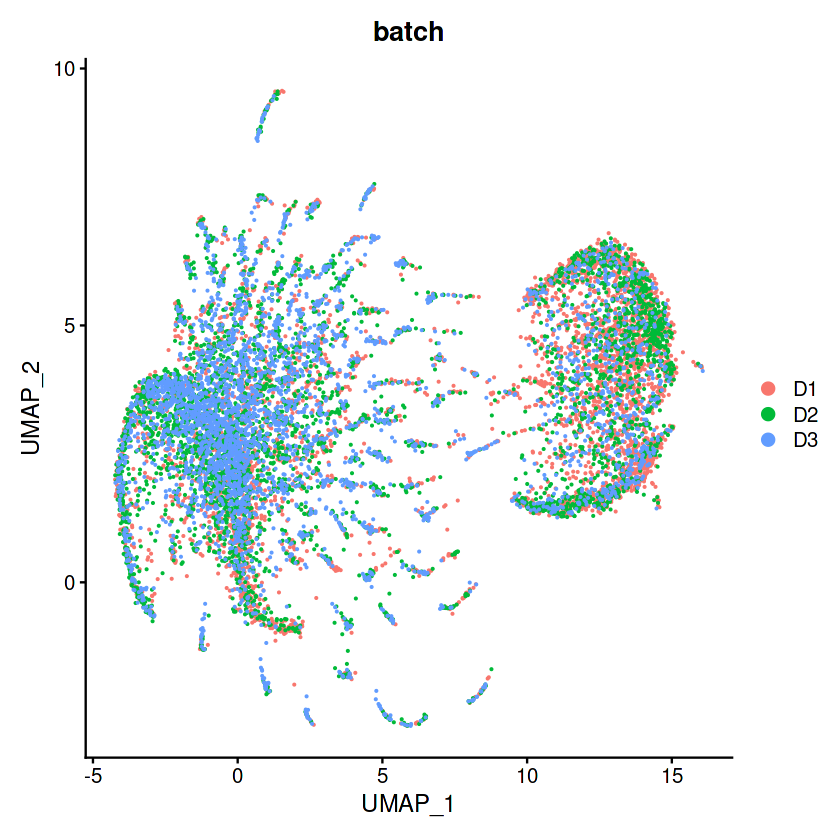

In [44]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch@meta.data$orig.ident=char_layer
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

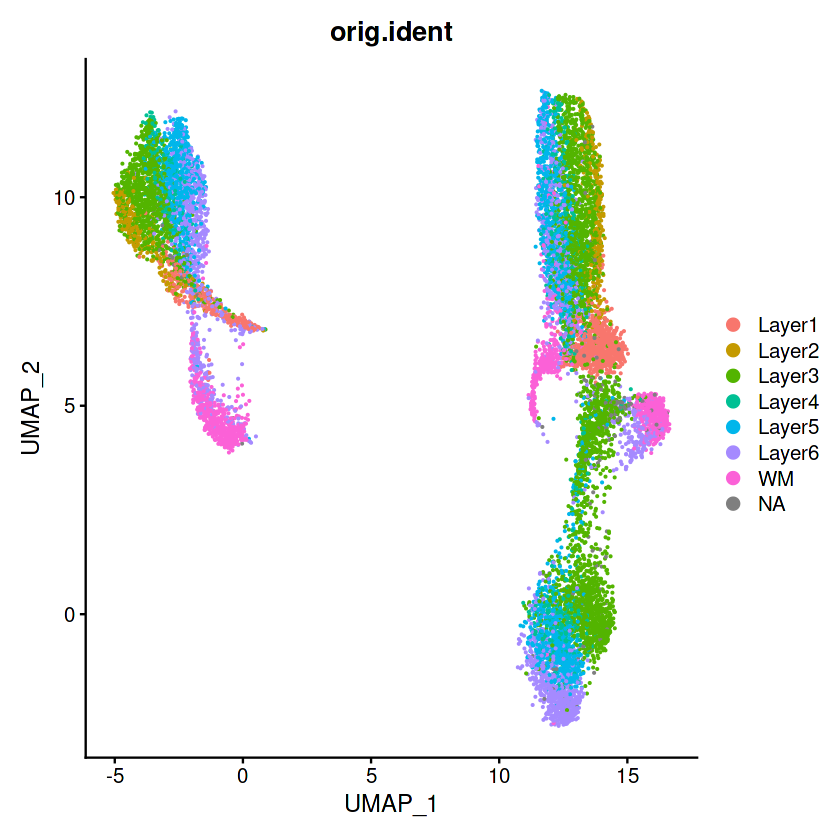

In [37]:
DimPlot(pbmc_batch, reduction='umap', group.by='orig.ident', pt.size=0.1) 

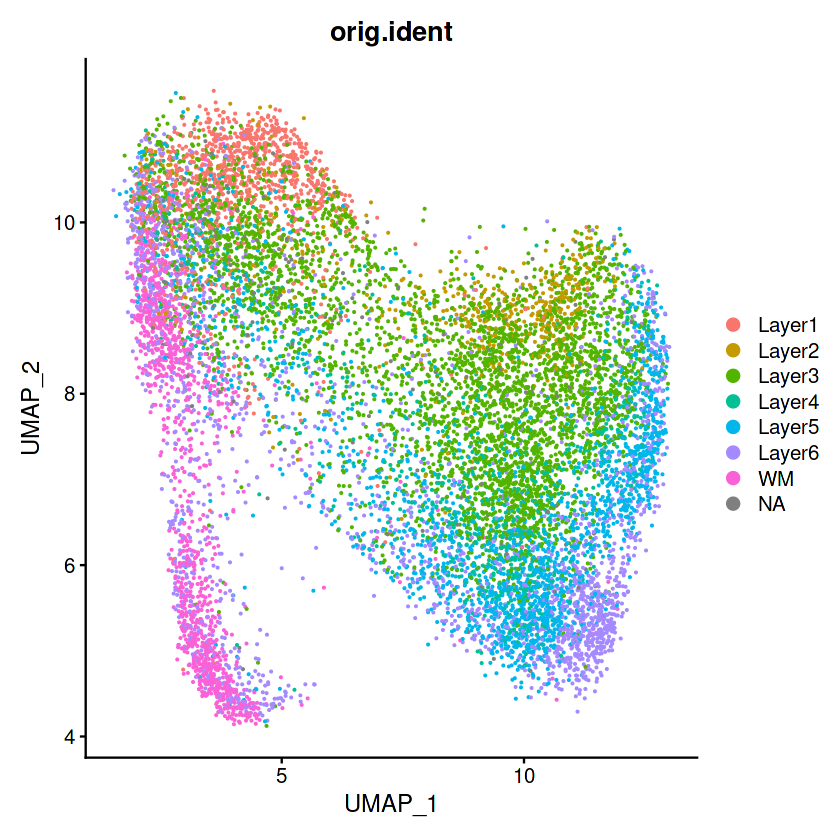

In [32]:
DimPlot(pbmc_batch, reduction='umap', group.by='orig.ident', pt.size=0.1) 

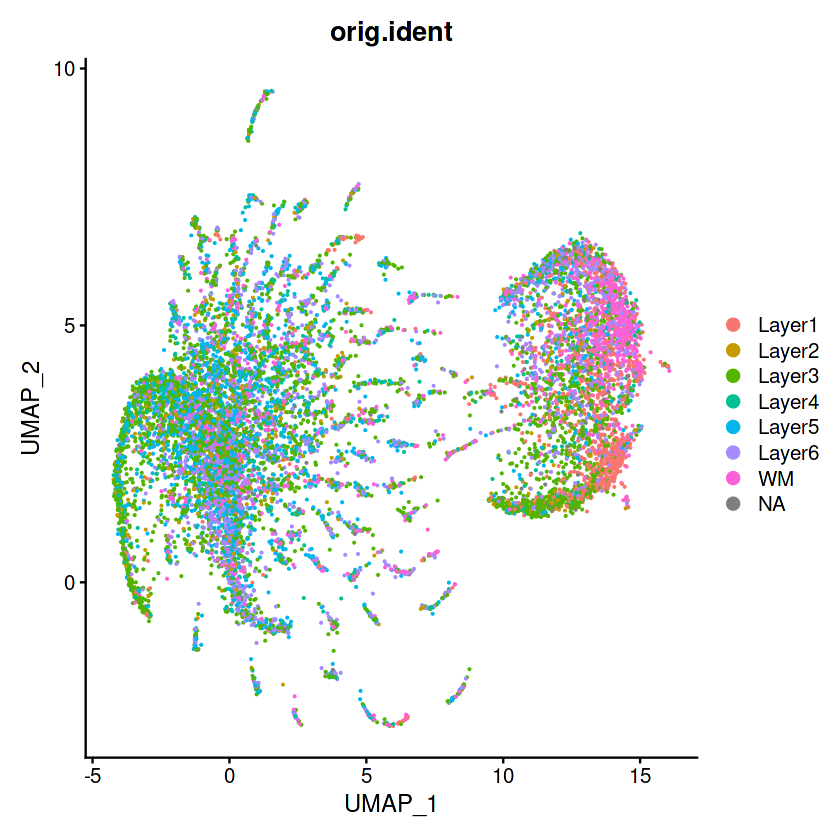

In [45]:
DimPlot(pbmc_batch, reduction='umap', group.by='orig.ident', pt.size=0.1) 

Centering and scaling data matrix

PC_ 1 
Positive:  3457 
Negative:  ENSG00000142192 



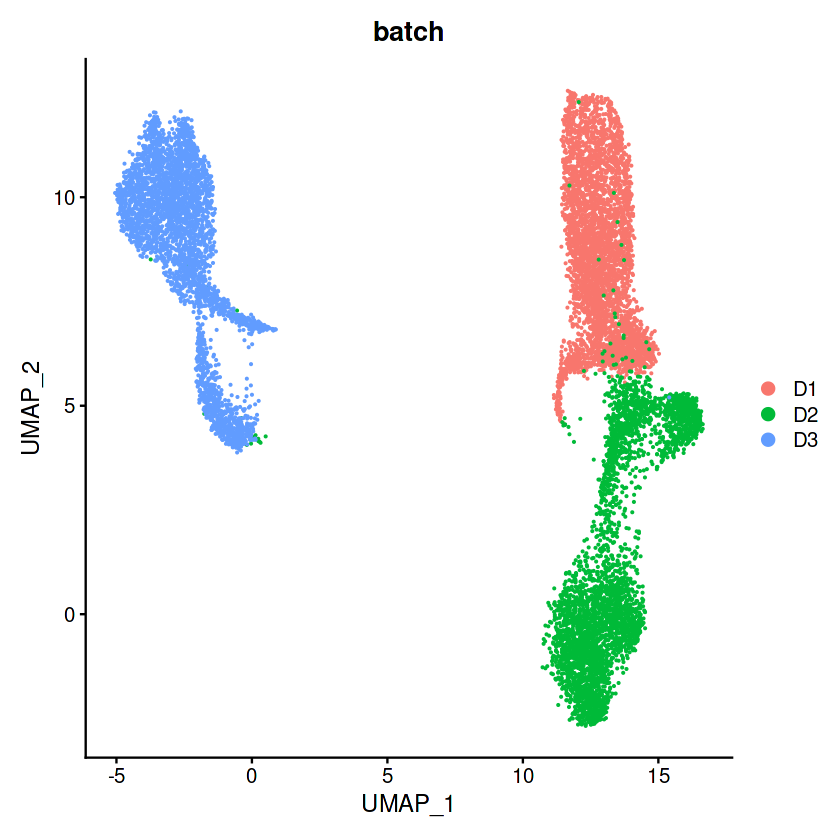

In [21]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

In [33]:
plot_save <- DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1)
ggsave('com4a_unfil_umap_plot_baserow_0816_gnum50_pc30_GN1000_R2.png',plot_save)

Saving 6.67 x 6.67 in image


In [34]:
plot_save <- DimPlot(pbmc_batch, reduction='umap', group.by='orig.ident', pt.size=0.1)
ggsave('layer_com4a_unfil_umap_plot_baserow_0816_gnum50_pc30_GN1000_R2.png',plot_save)

Saving 6.67 x 6.67 in image


In [31]:
pbmc@meta.data

orig.ident nCount_RNA nFeature_RNA batch group map
AAACAACGAATAGTTC.1   Layer1     4761.129   6828         D1    D1_26 NA 
AAACAAGTATCTCCCA.1   Layer3     5525.503   8271         D1    D1_10 V1 
AAACAATCTACTAGCA.1   Layer1     5072.243   7194         D1    D1_16 NA 
AAACACCAATAACTGC.1   WM         5609.661   7997         D1    D1_4  NA 
AAACAGCTTTCAGAAG.1   Layer6     5389.841   7721         D1    D1_37 NA 
AAACAGGGTCTATATT.1   Layer6     5417.953   8236         D1    D1_6  NA 
AAACAGTGTTCCTGGG.1   WM         5242.483   7451         D1    D1_28 NA 
AAACATTTCCCGGATT.1   Layer5     5592.206   8448         D1    D1_49 NA 
AAACCACTACACAGAT.1   Layer3     5629.805   9012         D1    D1_19 V1 
AAACCCGAACGAAATC.1   Layer3     5538.219   8494         D1    D1_19 V1 
AAACCGGGTAGGTACC.1   Layer5     5443.397   8306         D1    D1_10 V1 
AAACCGTTCGTCCAGG.1   Layer6     5432.690   8082         D1    D1_47 V1 
AAACCTAAGCAGCCGG.1   Layer6     5459.282   8362         D1    D1_47 V1 
AAACCTCATGAAGTTG.1   Layer5     5421.469   7818         D1    D1_40 NA 
AAACGAAGAACATACC.1   Layer1     4704.050   6743         D1    D1_50 NA 
AAACGACAGTCTTGCC.1   Layer3     5478.361   8296         D1    D1_2  NA 
AAACGAGACGGTTGAT.1   Layer3     5098.971   7298         D1    D1_1  NA 
AAACGCCCGAGATCGG.1   Layer2     5573.465   8602         D1    D1_19 V1 
AAACGGGCGTACGGGT.1   Layer5     5625.336   8982         D1    D1_41 V1 
AAACGGGTTGGTATCC.1   Layer1     5148.649   7241         D1    D1_8  NA 
AAACGGTTGCGAACTG.1   WM         4969.941   7003         D1    D1_42 NA 
AAACGTGTTCGCCCTA.1   Layer1     5336.295   7406         D1    D1_29 NA 
AAACTAACGTGGCGAC.1   Layer1     5295.492   7715         D1    D1_36 NA 
AAACTCGGTTCGCAAT.1   Layer6     5593.704   8695         D1    D1_41 V1 
AAACTCGTGATATAAG.1   Layer1     4945.384   6980         D1    D1_42 NA 
AAACTGCTGGCTCCAA.1   Layer4     5181.130   7433         D1    D1_39 NA 
AAACTTGCAAACGTAT.1   Layer6     5538.401   8491         D1    D1_49 NA 
AAAGAATGTGGACTAA.1   Layer6     5643.932   8738         D1    D1_49 NA 
AAAGACATGAAGTTTA.1   Layer2     5587.404   8611         D1    D1_19 V1 
AAAGACCCAAGTCGCG.1   Layer2     5437.796   8388         D1    D1_2  NA 
⋮                    ⋮          ⋮          ⋮            ⋮     ⋮     ⋮  
TTGGCCTAGAATTTCG.1.2 Layer3     6656.609   11465        D3    D3_10 V2 
TTGGCTCAATATGTGT.1.2 NA         6241.238    9865        D3    D3_7  NA 
TTGGCTCGCATGAGAC.1.2 Layer4     5970.849    9143        D3    D3_48 NA 
TTGGGAAGACGAGCCG.1.2 Layer6     6320.144    9843        D3    D3_24 NA 
TTGGGACACTGCCCGC.1.2 Layer6     6242.602    9980        D3    D3_23 NA 
TTGGGACGTAAGAGTT.1.2 Layer3     6592.293   11569        D3    D3_10 V2 
TTGGGCGGCGGTTGCC.1.2 Layer5     6489.265   10578        D3    D3_44 NA 
TTGGTCACACTCGTAA.1.2 WM         6502.358   10321        D3    D3_24 NA 
TTGGTTGCGGTGCGCG.1.2 WM         6240.162    9749        D3    D3_18 NA 
TTGTAAGGACCTAAGT.1.2 WM         6262.835    9635        D3    D3_30 NA 
TTGTAAGGCCAGTTGG.1.2 Layer5     6439.362   10228        D3    D3_4  NA 
TTGTAATCCGTACTCG.1.2 Layer6     6272.377    9745        D3    D3_27 NA 
TTGTATCACACAGAAT.1.2 Layer3     6435.733   10222        D3    D3_6  NA 
TTGTCGTTCAGTTACC.1.2 Layer5     6132.460    9385        D3    D3_42 NA 
TTGTGAACCTAATCCG.1.2 Layer4     6570.411   11697        D3    D3_34 V2 
TTGTGAGGCATGACGC.1.2 Layer5     6006.731    9379        D3    D3_42 NA 
TTGTGCAGCCACGTCA.1.2 Layer5     6575.724   10507        D3    D3_17 V2 
TTGTGGCCCTGACAGT.1.2 Layer5     6433.612   10402        D3    D3_11 NA 
TTGTGGTAGGAGGGAT.1.2 WM         6077.791    9299        D3    D3_30 NA 
TTGTGGTGGTACTAAG.1.2 Layer3     6654.725   11168        D3    D3_13 NA 
TTGTGTATGCCACCAA.1.2 Layer6     5712.986    8937        D3    D3_9  NA 
TTGTGTTTCCCGAAAG.1.2 Layer6     6065.361    9242        D3    D3_48 NA 
TTGTTAGCAAATTCGA.1.2 Layer4     6411.472   10436        D3    D3_31 NA 
TTGTTCAGTGTGCTAC.1.2 Layer5     6549.997   11184        D3   

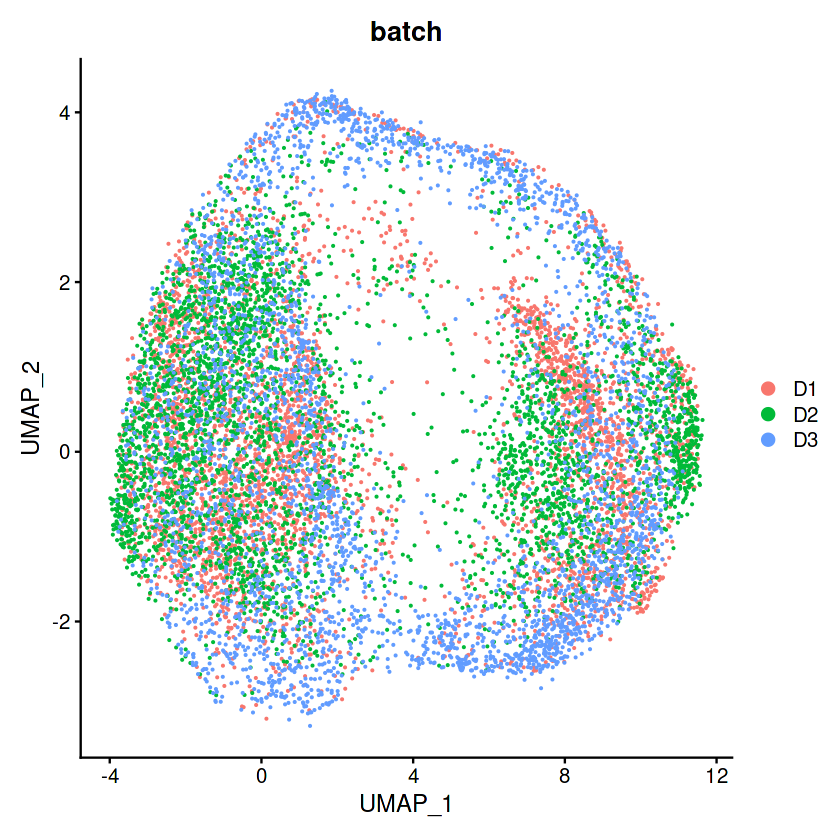

In [23]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [24]:
# library(ggplot2)
umap_plot <- DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  
ggsave('umap_plot_gg.png',umap_plot)

ERROR: Error in ggsave("umap_plot_gg.png", umap_plot): could not find function "ggsave"


In [2]:
D1=readRDS('demo_BEER/MGH36.RDS')
D2=readRDS('demo_BEER/MGH53.RDS')
D3=readRDS('demo_BEER/MGH54.RDS')
D4=readRDS('demo_BEER/MGH60.RDS')
D5=readRDS('demo_BEER/MGH93.RDS')
D6=readRDS('demo_BEER/MGH97.RDS')

BATCH=c(rep('D1',ncol(D1)),
        rep('D2',ncol(D2)),
        rep('D3',ncol(D3)),
        rep('D4',ncol(D4)),
        rep('D5',ncol(D5)),
        rep('D6',ncol(D6)) )
        
D12=.simple_combine(D1,D2)$combine
D34=.simple_combine(D3,D4)$combine
D56=.simple_combine(D5,D6)$combine
D1234=.simple_combine(D12,D34)$combine
D123456=.simple_combine(D1234,D56)$combine

DATA=D123456   

# rm(D1);rm(D2);rm(D3);rm(D4);rm(D5);rm(D6)
# rm(D12);rm(D34);rm(D56);rm(D1234);rm(D123456)

[1] "BEER start!"
[1] "2023-03-09 15:55:44 KST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 30
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "D1"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 2
[1] "D2"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 3
[1] "D3"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 4
[1] "D4"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 5
[1] "D5"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] 6
[1] "D6"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "Total varible gene number (GN) is:"
[1] 4554


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Found 991 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found6batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  BCAN 
Negative:  C1QC 



[1] "Get group for:"
[1] "D1"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D2"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D3"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D4"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D5"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "D6"
[1] "Group Number:"
[1] 30
[1] "Finding MN pairs..."
[1] "1 / 180"
[1] "101 / 180"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 34
[1] "Evaluating PCs ..."
[1] "Start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "###################

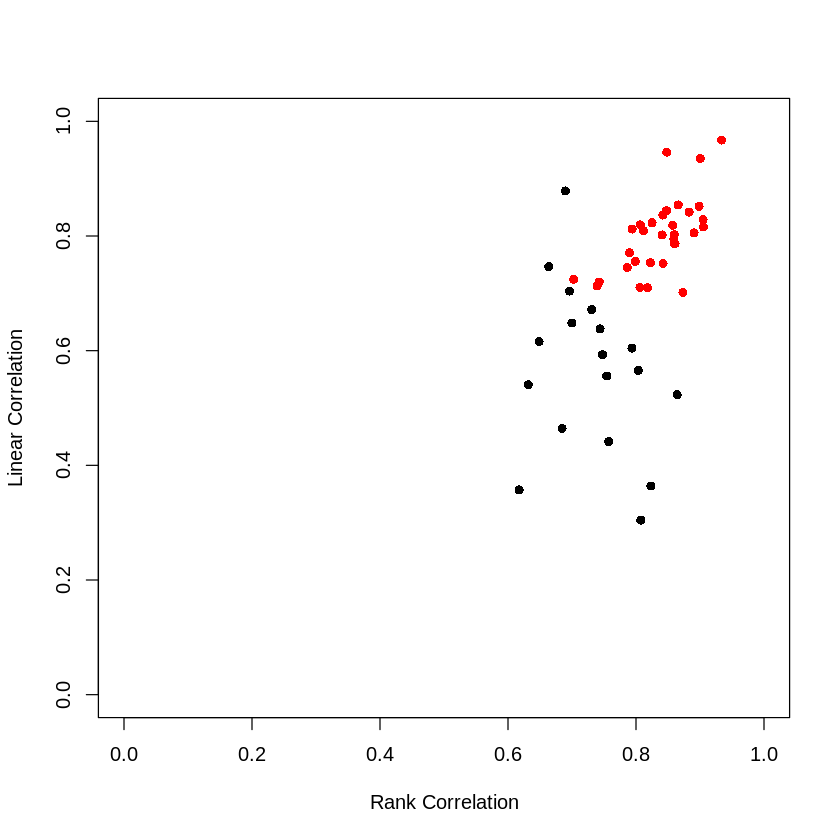

In [3]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE )

# Check selected PCs
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix

PC_ 1 
Positive:  LAPTM5 
Negative:  BCAN 



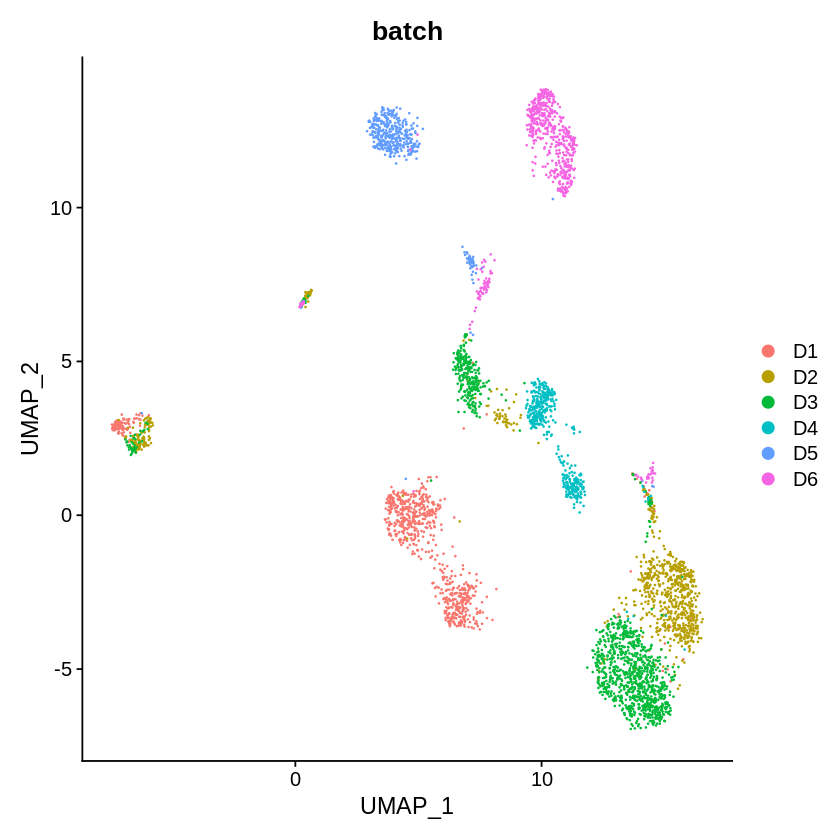

In [4]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
# VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2, umap.method = "umap-learn",  metric="correlation")
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

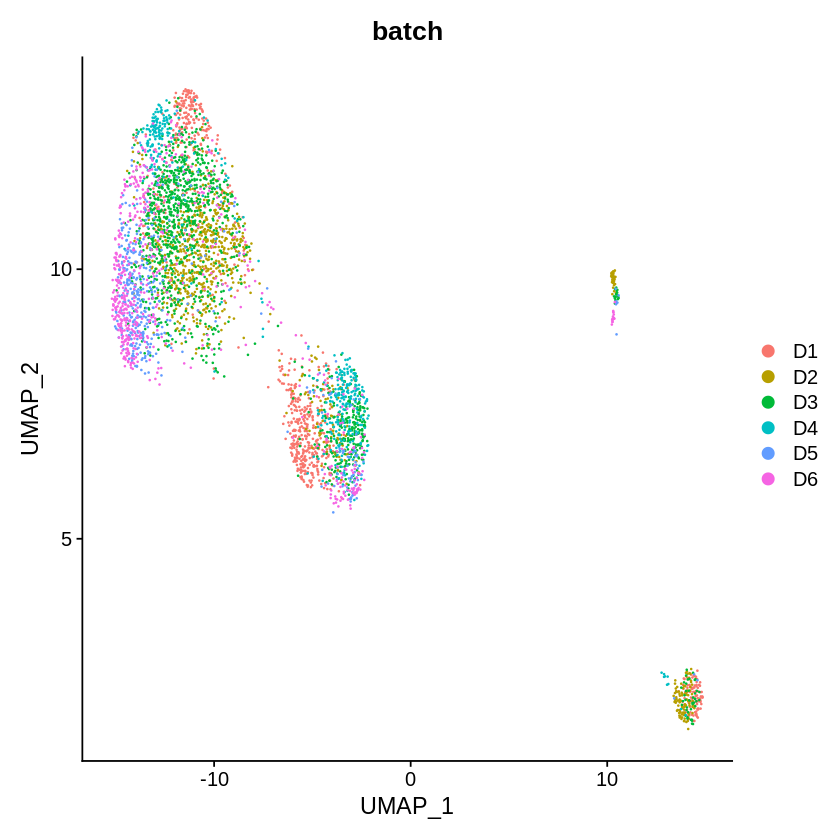

In [5]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

Warning message:
“The following arguments are not used: check_duplicates”


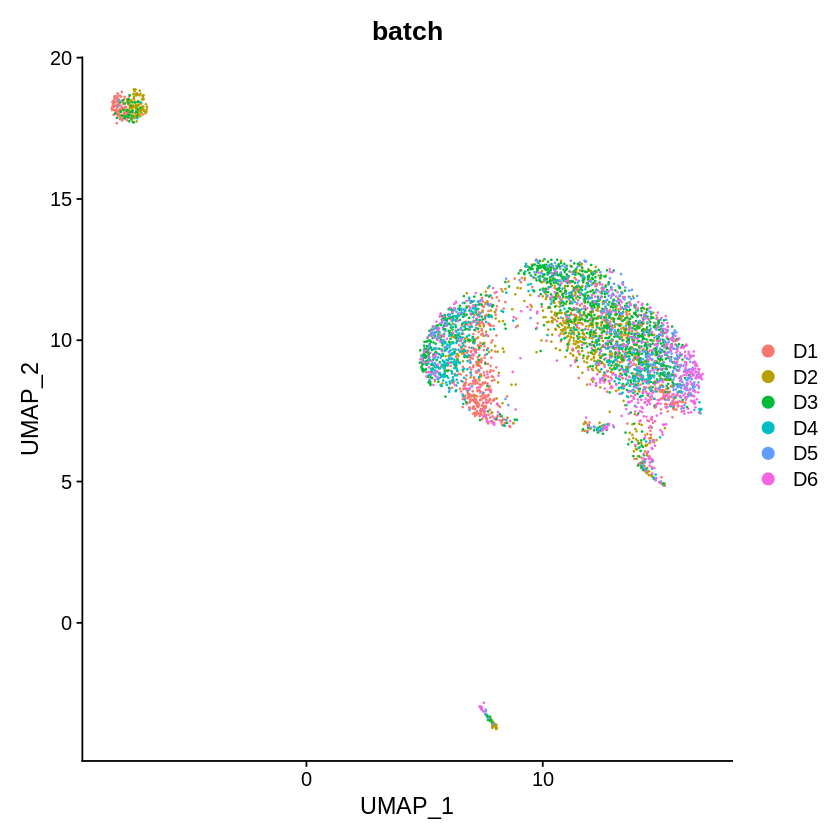

In [6]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, check_duplicates=FALSE, umap.method='umap-learn', metric='correlation')

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1)  

In [ ]:
D1 <- read.table("demo_BEER/DATA1_MAT.txt", sep='\t', row.names=1, header=T)
D2 <- read.table("demo_BEER/DATA2_MAT.txt", sep='\t', row.names=1, header=T)

In [ ]:
colnames(D1)=paste0('D1_', colnames(D1))
colnames(D2)=paste0('D2_', colnames(D2))

DATA=.simple_combine(D1,D2)$combine

BATCH=rep('D2',ncol(DATA))
BATCH[c(1:ncol(D1))]='D1'

In [ ]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE, RMG=NULL) 

In [ ]:
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

In [ ]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2)
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

In [ ]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE, check_duplicates=FALSE)

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 